In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset was extracted by Mr. Barry Bcker from the 1994 census database, it consists of personal & financial information of adults. The dataset can be used to analyse what factors are responsible for an individuals income. It can also be used to predict whether an individual earns more than 50k dollars or not.

# Features Description

In [224]:
df = pd.read_csv("adult.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Let's load the feature names

In [225]:
feature_names = {0:"age",1:"workclass",2:"final_weight",3:"education",4:"education_level",5:"marital_status",6:"occupation",7:"relationship",8:"race",9:"sex",10:"capital_gain",11:"capital_loss",12:"hours_per_week",13:"native_country",14:"Income>50K"}
feature_names

{0: 'age',
 1: 'workclass',
 2: 'final_weight',
 3: 'education',
 4: 'education_level',
 5: 'marital_status',
 6: 'occupation',
 7: 'relationship',
 8: 'race',
 9: 'sex',
 10: 'capital_gain',
 11: 'capital_loss',
 12: 'hours_per_week',
 13: 'native_country',
 14: 'Income>50K'}

In [226]:
df.rename(index=str,columns=feature_names,inplace=True)
df.head()

,age,workclass,final_weight,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [227]:
df.shape

(32561, 15)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_level  32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  Income>50K       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Let's look into the distribution of features in the dataset

Text(0.5, 1.0, 'Distribution of Age of Adults')

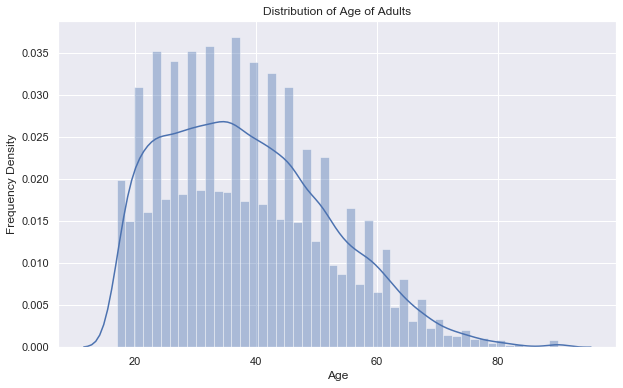

In [229]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"])
#plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Frequency Density')
plt.title('Distribution of Age of Adults')

The distribution of Age approximates a normal distribution skewed to the right

In [230]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Let's replace the garbage values in all columns by NaN

In [231]:
df.replace(' ?', np.NaN,inplace=True)

In [232]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Workclass - Barplot')

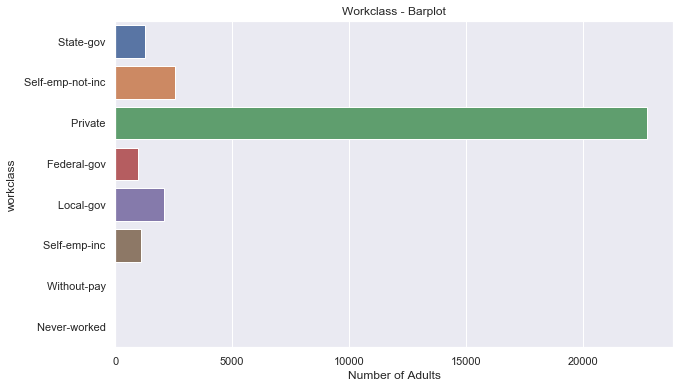

In [233]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["workclass"])
plt.ylabel('workclass')
plt.xlabel('Number of Adults')
plt.title('Workclass - Barplot')

Most of the adults in the dataset are employed in the Private Sector

In [234]:
df['workclass'] = df['workclass'].replace({" Self-emp-not-inc":"Self_Employed", " Self-emp-inc":'Self_Employed'," Local-gov":"Government"," State-gov":"Government"," Federal-gov":"Government"," Without-pay":"Others"," Never-worked":"Others"})

In [235]:
df["workclass"].value_counts()

 Private         22696
Government        4351
Self_Employed     3657
Others              21
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Workclass - Barplot')

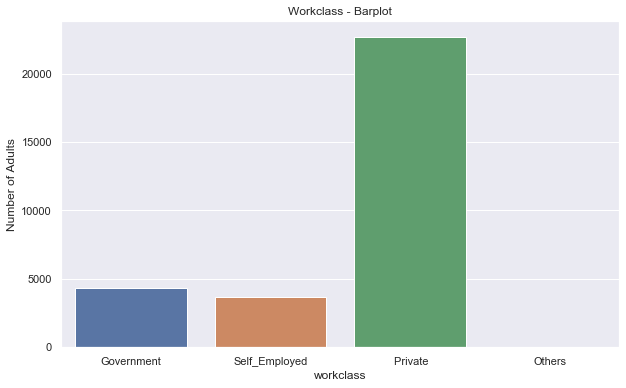

In [236]:
plt.figure(figsize=(10,6))
sns.countplot(df["workclass"])
plt.xlabel('workclass')
plt.ylabel('Number of Adults')
plt.title('Workclass - Barplot')

Text(0.5, 1.0, 'Distribution of final_weight of Adults')

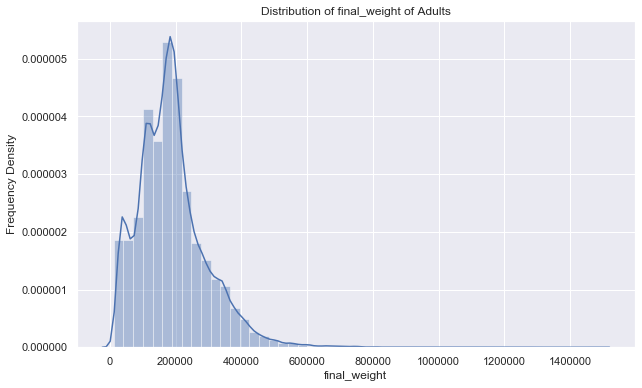

In [237]:
plt.figure(figsize=(10,6))
sns.distplot(df["final_weight"])
#plt.xticks(rotation = 90)
plt.xlabel('final_weight')
plt.ylabel('Frequency Density')
plt.title('Distribution of final_weight of Adults')

The distribution of final_weight feature is skewed to the right

Text(0.5, 1.0, 'Education - Barplot')

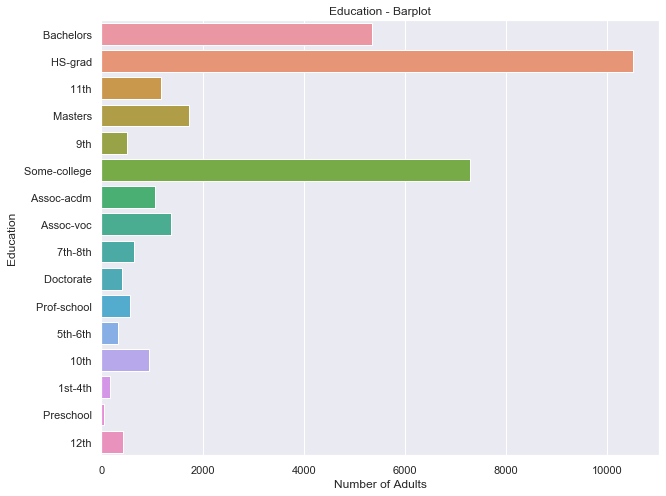

In [238]:
plt.figure(figsize=(10,8))
sns.countplot(y=df["education"])
plt.ylabel('Education')
plt.xlabel('Number of Adults')
plt.title('Education - Barplot')

Most of the adults in the dataset belong to HS-grad followed by Some-College and then bachelors

Text(0.5, 1.0, 'Education Level - Barplot')

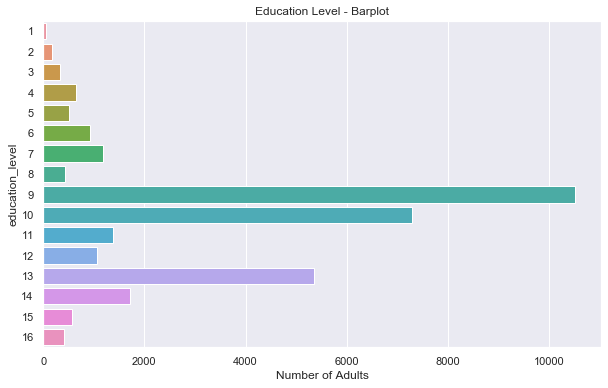

In [239]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["education_level"])
plt.ylabel('education_level')
plt.xlabel('Number of Adults')
plt.title('Education Level - Barplot')

The contents of education level are same as that of education column, except in education level the entries are encoded and ordered as per number of years spent in education

Let's create three classes of education for simplicity

In [240]:
df['education_level'] = df['education_level'].replace({1:"Less_Qualified", 2:'Less_Qualified',3:"Less_Qualified",4:"Less_Qualified",5:"Less_Qualified",6:"Less_Qualified",7:"Less_Qualified",8:"Less_Qualified",9:"Qualified",10:"Qualified",11:"Qualified",12:"Qualified",13:"Highly_Qualified",14:"Highly_Qualified",15:"Highly_Qualified",16:"Highly_Qualified"})

Text(0.5, 1.0, 'Education Level - Barplot')

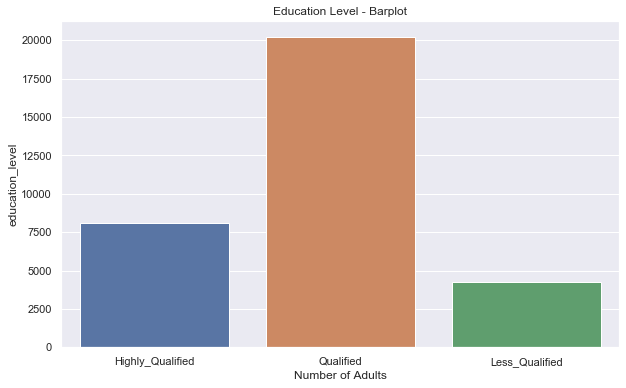

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(df["education_level"])
plt.ylabel('education_level')
plt.xlabel('Number of Adults')
plt.title('Education Level - Barplot')

Text(0.5, 1.0, 'Marital Status - Barplot')

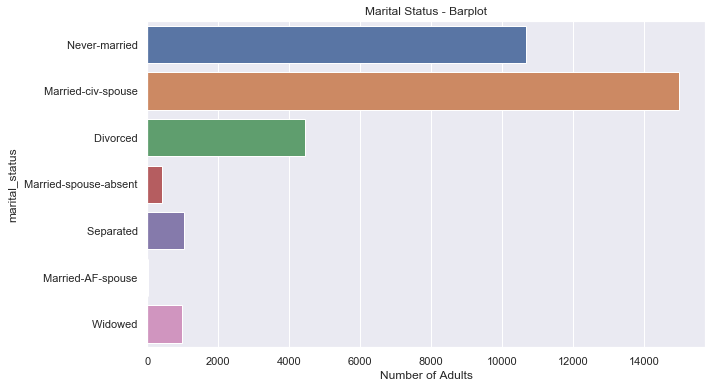

In [243]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["marital_status"])
plt.ylabel('marital_status')
plt.xlabel('Number of Adults')
plt.title('Marital Status - Barplot')

Most of the adults in the dataset belong to Married-civ-spouse followed by never married

Let's group all the married classes together

In [244]:
df['marital_status'] = df['marital_status'].replace({" Married-civ-spouse":"Married", " Married-spouse-absent":'Married'," Married-AF-spouse":"Married"})

Text(0.5, 1.0, 'Marital Status - Barplot')

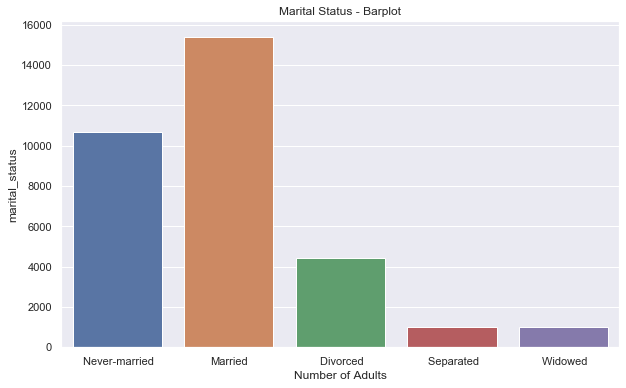

In [245]:
plt.figure(figsize=(10,6))
sns.countplot(df["marital_status"])
plt.ylabel('marital_status')
plt.xlabel('Number of Adults')
plt.title('Marital Status - Barplot')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_level  32561 non-null  object
 5   marital_status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   31978 non-null  object
 14  Income>50K       32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


Text(0.5, 1.0, 'occupation - Barplot')

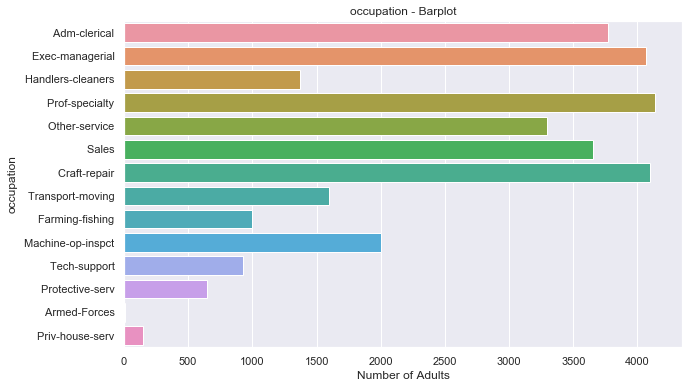

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["occupation"])
plt.ylabel('occupation')
plt.xlabel('Number of Adults')
plt.title('occupation - Barplot')

Most of the adults have prof-speciality, exec managerial and craft repair as occupation

Text(0.5, 1.0, 'relationship - Barplot')

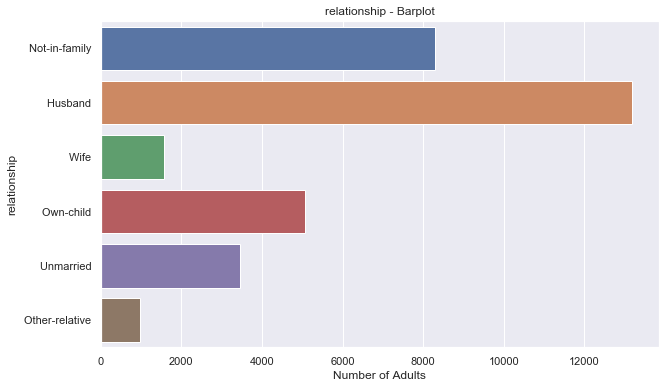

In [248]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["relationship"])
plt.ylabel('relationship')
plt.xlabel('Number of Adults')
plt.title('relationship - Barplot')

Most of the adults in the dataset are husbands followed by not in family

Text(0.5, 1.0, 'race - Barplot')

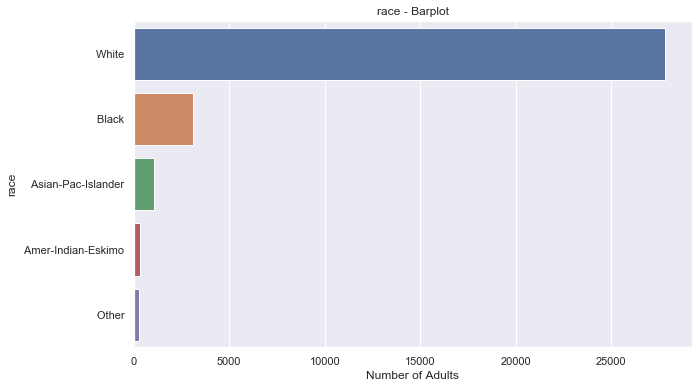

In [249]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["race"])
plt.ylabel('race')
plt.xlabel('Number of Adults')
plt.title('race - Barplot')

Most of the adults in the dataset are white

 Male      21790
 Female    10771
Name: sex, dtype: int64

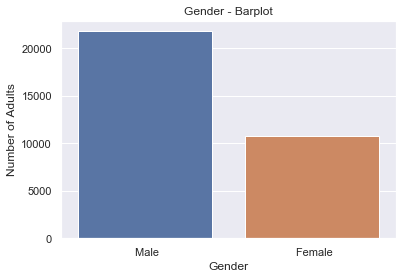

In [250]:
sns.countplot(df["sex"])
plt.xlabel('Gender')
plt.ylabel('Number of Adults')
plt.title('Gender - Barplot')
df["sex"].value_counts()

Most of the adults in the dataset are male

Text(0.5, 1.0, 'Capital Gain - Histogram')

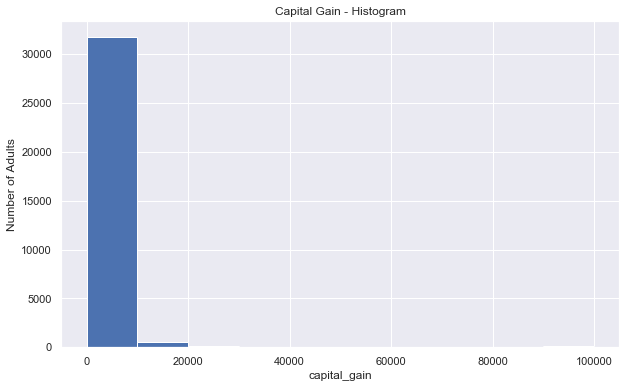

In [251]:
plt.figure(figsize=(10,6))
plt.hist(df["capital_gain"])
#plt.xticks(rotation = 90)
plt.xlabel('capital_gain')
plt.ylabel('Number of Adults')
plt.title('Capital Gain - Histogram')

Most of the adults in the dataset have very low incomes (0-10000$) from investments other than salary/wage

Text(0.5, 1.0, 'capital_loss - Distplot')

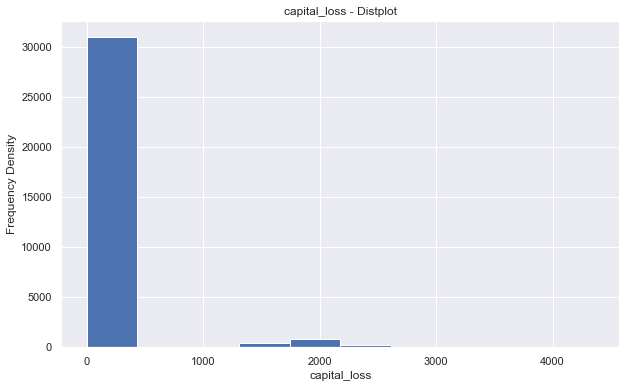

In [252]:
plt.figure(figsize=(10,6))
plt.hist(df["capital_loss"])
#plt.xticks(rotation = 90)
plt.xlabel('capital_loss')
plt.ylabel('Frequency Density')
plt.title('capital_loss - Distplot')

Most of the adults in the dataset have very low losses (0-500$) from investments

Text(0.5, 1.0, 'work_hours_per_week - Distplot')

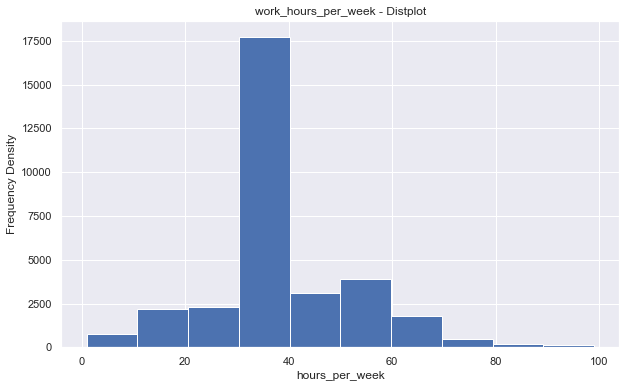

In [253]:
plt.figure(figsize=(10,6))
plt.hist(df["hours_per_week"])
#plt.xticks(rotation = 90)
plt.xlabel('hours_per_week')
plt.ylabel('Frequency Density')
plt.title('work_hours_per_week - Distplot')

Most of the adults in the dataset work between 30-40 hours a week

Text(0.5, 1.0, 'native country - Barplot')

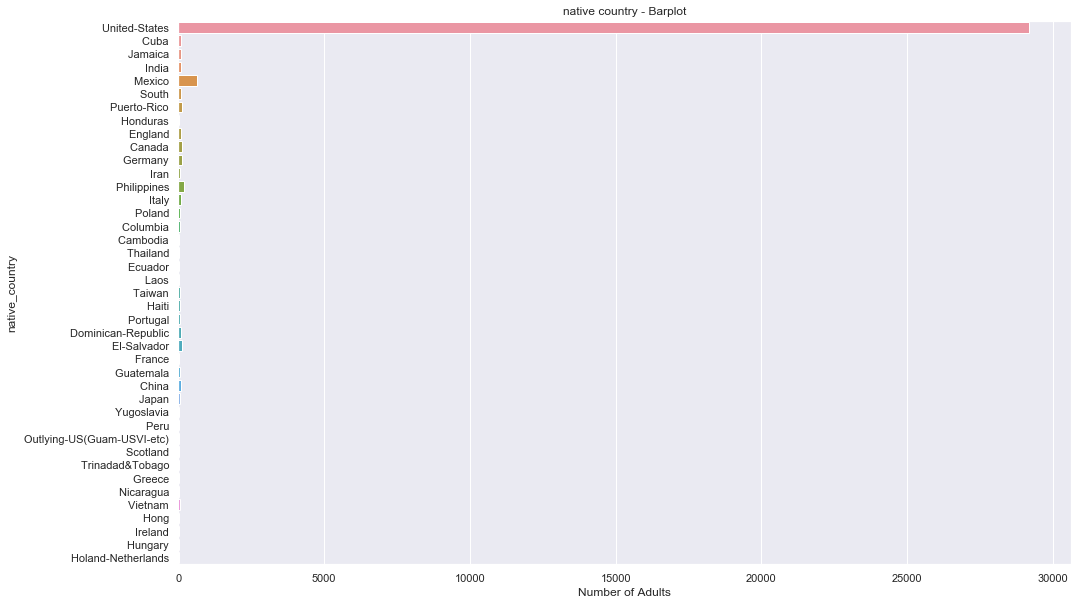

In [254]:
plt.figure(figsize=(16,10))
sns.countplot(y=df["native_country"])
plt.ylabel('native_country')
plt.xlabel('Number of Adults')
plt.title('native country - Barplot')

Most of the adults in the datasets are US born citizens

In [255]:
df["native_country"].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

 <=50K    24720
 >50K      7841
Name: Income>50K, dtype: int64

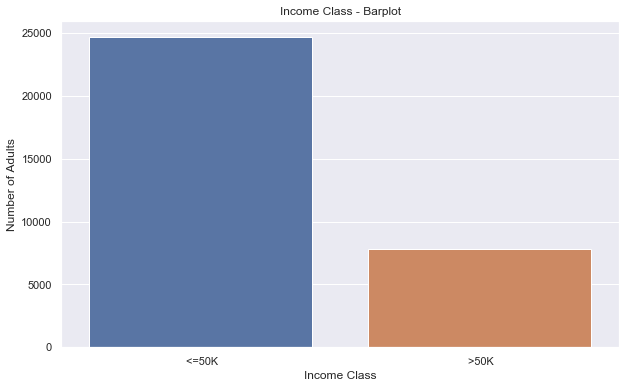

In [256]:
plt.figure(figsize=(10,6))
sns.countplot(df["Income>50K"])
plt.ylabel('Number of Adults')
plt.xlabel('Income Class')
plt.title('Income Class - Barplot')
df["Income>50K"].value_counts()

Majority of the adults earn less than 50k dollars annually in the sample

Bivariate Analysis

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_level  32561 non-null  object
 5   marital_status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   31978 non-null  object
 14  Income>50K       32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


Text(0.5, 1.0, 'Income>50K vs age - Boxplot')

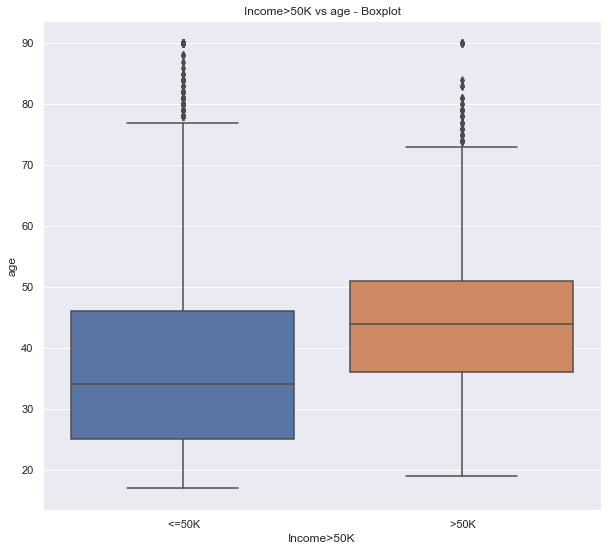

In [258]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Income>50K", y="age",data=df)
plt.title('Income>50K vs age - Boxplot')

Adults with higher median age generally have higher incomes

Text(0.5, 1.0, 'Workclass as per Income - Barplot')

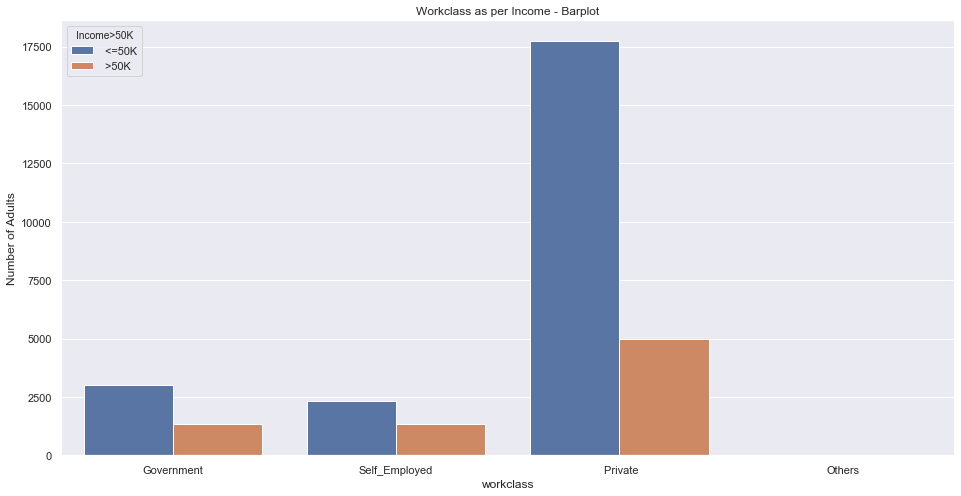

In [259]:
plt.figure(figsize=(16,8))
sns.countplot(x="workclass",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('Workclass as per Income - Barplot')

Majority of the adults who earn more than 50k are employed in the private sector also only almost 25% of the adults employed in the private sector earn more than 50k dollars

In [260]:
df["workclass"].value_counts()

 Private         22696
Government        4351
Self_Employed     3657
Others              21
Name: workclass, dtype: int64

In [261]:
df["workclass"].value_counts()

 Private         22696
Government        4351
Self_Employed     3657
Others              21
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Income>50K vs final_weight - Boxplot')

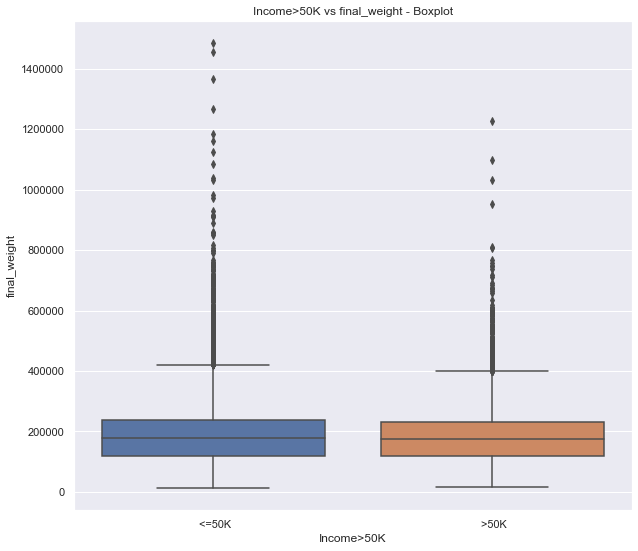

In [262]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Income>50K", y="final_weight",data=df)
plt.title('Income>50K vs final_weight - Boxplot')

The above plot shows that final weight alone can not determine whether the income is more than 50k dollars or not

Text(0.5, 1.0, 'education_level as per Income>50K - Barplot')

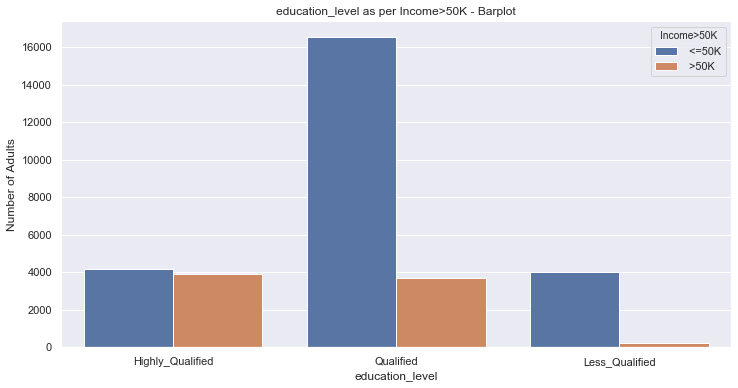

In [263]:
plt.figure(figsize=(12,6))
sns.countplot(x="education_level",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('education_level as per Income>50K - Barplot')

The above plot shows that adults who have education level less than 9 rarely earn more then 50k dollars. Also majority of adults who have education level of more than or equal to 12 are likely to earn more than 50k dollars anually

Text(0.5, 1.0, 'marital_status as per Income>50K - Barplot')

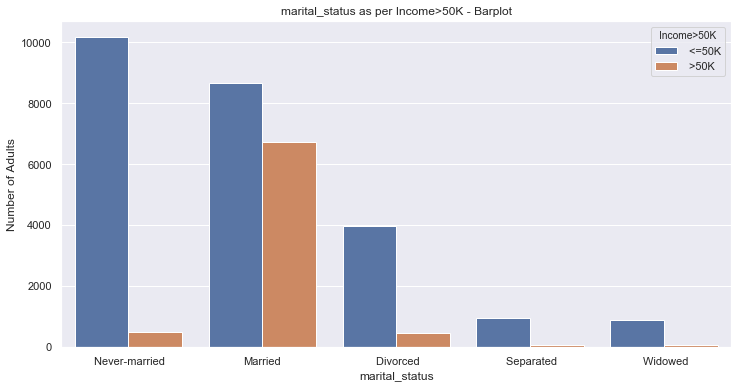

In [265]:
plt.figure(figsize=(12,6))
sns.countplot(x="marital_status",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('marital_status as per Income>50K - Barplot')

Most of the adults who earn more than 50k dollars are married with civilian spouses

Text(0.5, 1.0, 'occupation as per Income>50K - Barplot')

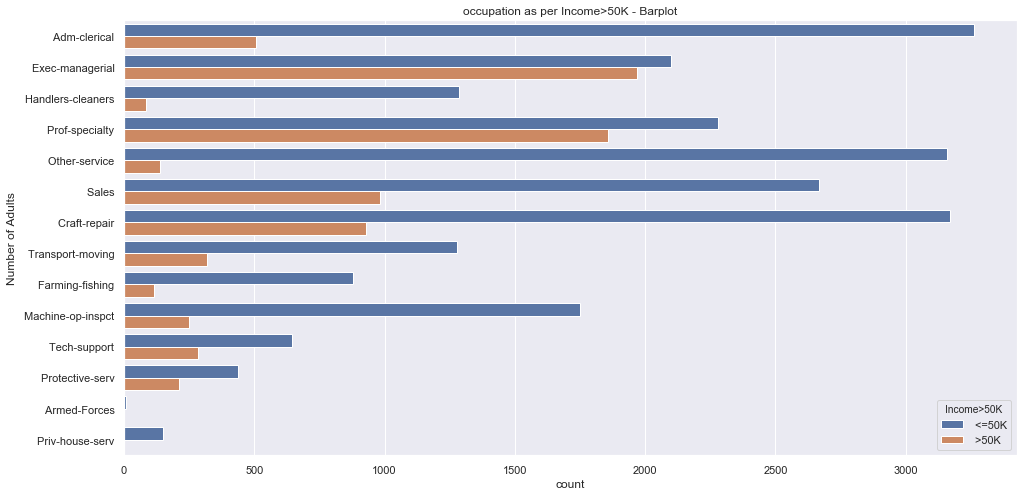

In [266]:
plt.figure(figsize=(16,8))
sns.countplot(y="occupation",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('occupation as per Income>50K - Barplot')

Most of the adults who earn more than 50k dollars have Exce managerial or prof-speciality followed by sales then craft repair as occupation

Text(0.5, 1.0, 'relationship as per Income - Barplot')

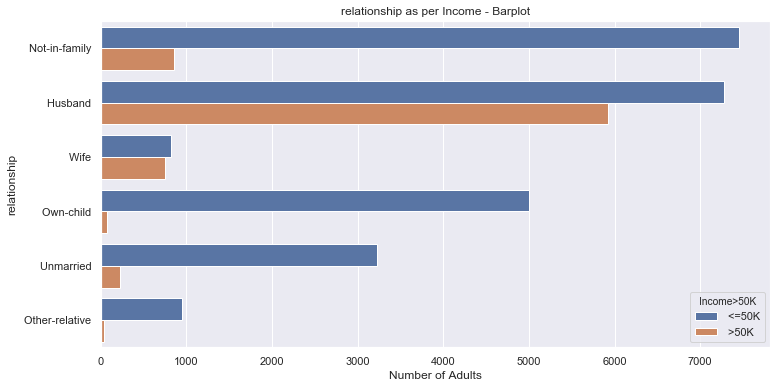

In [267]:
plt.figure(figsize=(12,6))
sns.countplot(y="relationship",hue="Income>50K", data = df)
plt.xlabel('Number of Adults')
plt.title('relationship as per Income - Barplot')

A huge proportion of the adults who earn more than 50k dollars are husbands

Text(0.5, 1.0, 'race as per Income>50K - Barplot')

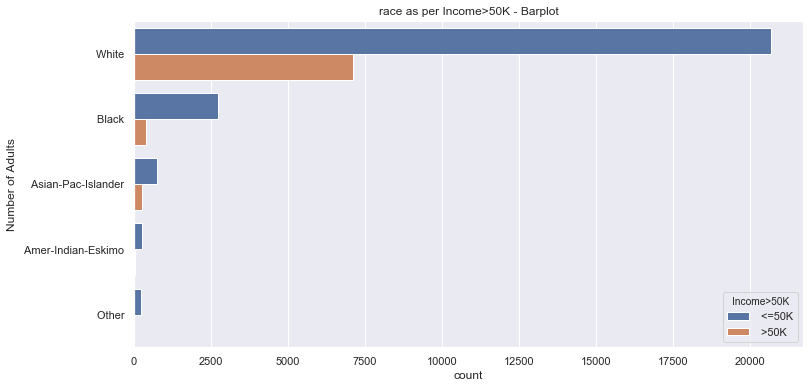

In [268]:
plt.figure(figsize=(12,6))
sns.countplot(y="race",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('race as per Income>50K - Barplot')

Adults who earn more than 50k dollars are mostly white

Let's drop the 0 income from investment entries which are skewing up the data in order to see its relationship with income

In [269]:
gain = df[df["capital_gain"] != 0]

Text(0.5, 1.0, 'Income>50K vs capital_gain - Boxplot')

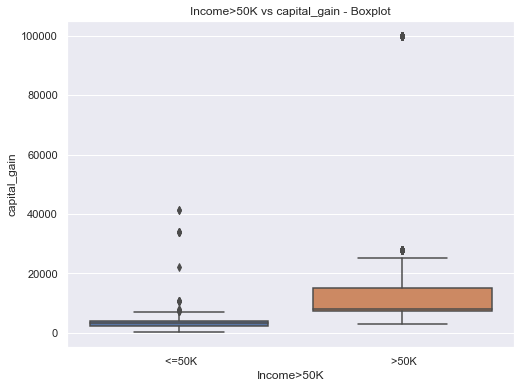

In [270]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Income>50K", y="capital_gain",data=gain)
plt.title('Income>50K vs capital_gain - Boxplot')

People who earn higher from investments are more likely to have an income more than 50k dollars compared to those earn lesser from investments

In [271]:
loss = df[df["capital_loss"] != 0]

Text(0.5, 1.0, 'Income>50K vs capital_loss - Boxplot')

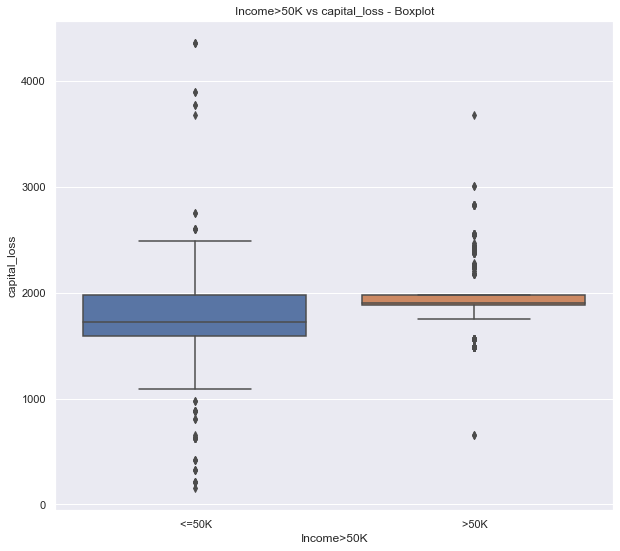

In [272]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Income>50K", y="capital_loss",data=loss)
plt.title('Income>50K vs capital_loss - Boxplot')

People who earn more then 50k dollars have relatively higher losses from their investments compared to those who earn less than 50k dollars, which shows that people who earn more than 50k dollars take higher risks in their investments

Text(0.5, 1.0, 'Income vs work_hours_per_week - Boxplot')

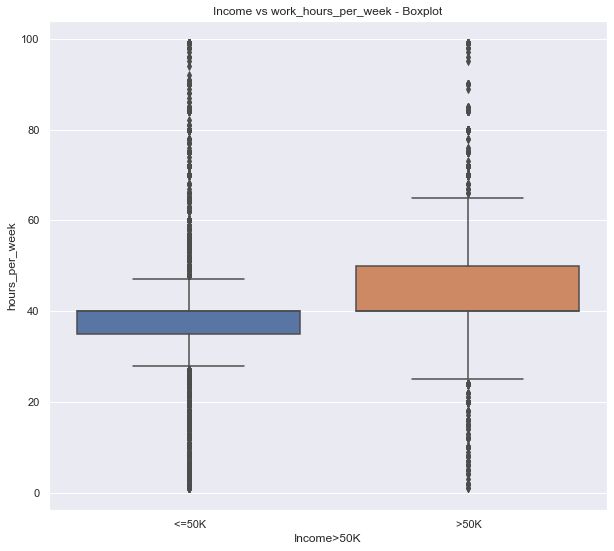

In [273]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Income>50K", y="hours_per_week",data=df)
plt.title('Income vs work_hours_per_week - Boxplot')

People who earn more than 50k dollars annually usually work for higher number of hours per week compared to those who earn less then 50k dollars

Text(0.5, 1.0, 'native_country as per Income>50K - Barplot')

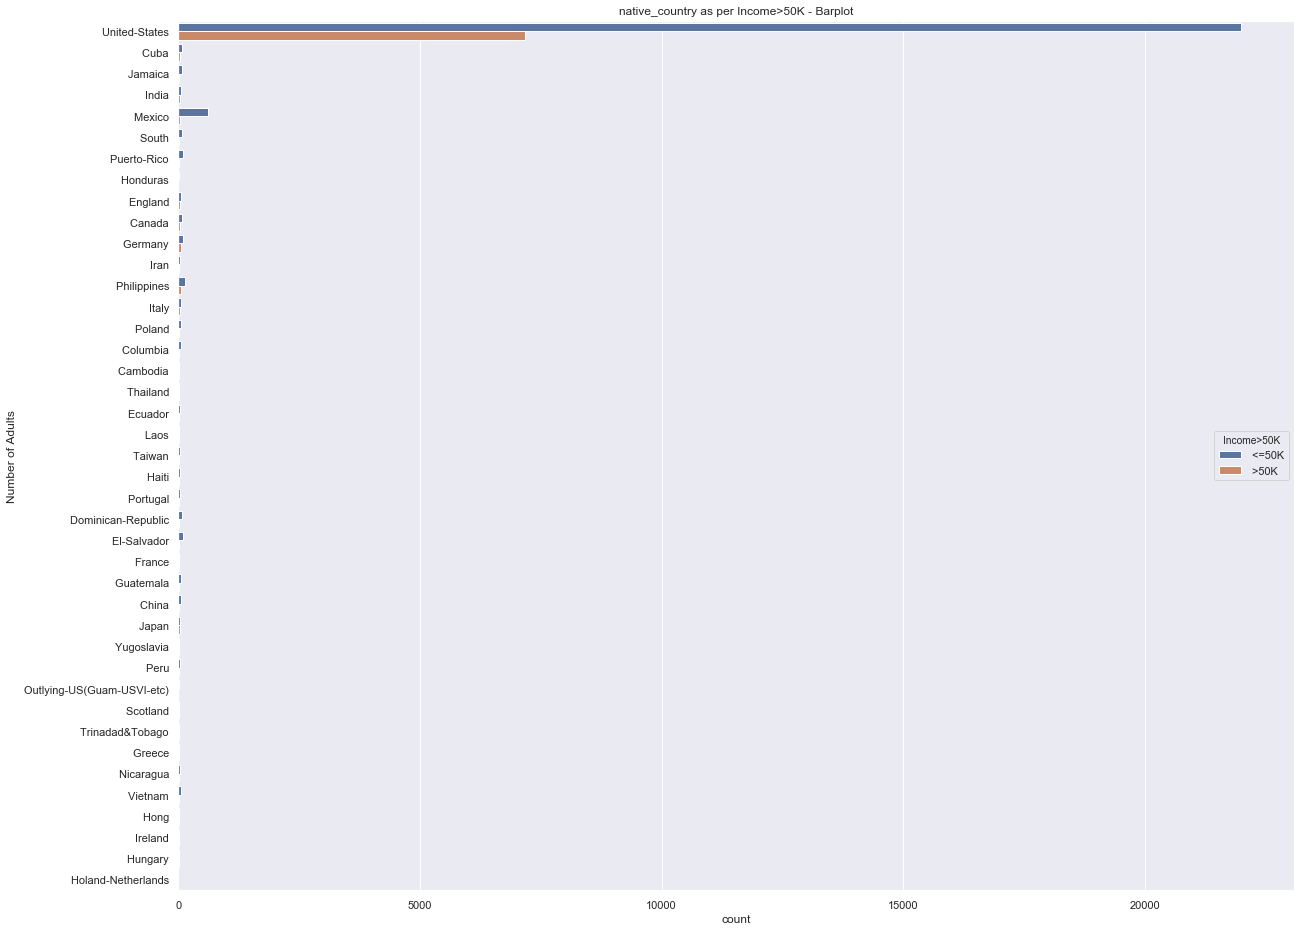

In [274]:
plt.figure(figsize=(20,16))
sns.countplot(y="native_country",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('native_country as per Income>50K - Barplot')

The dataset contains disproportionately higher cases of US

Text(0.5, 1.0, 'Gender as per Income>50K - Barplot')

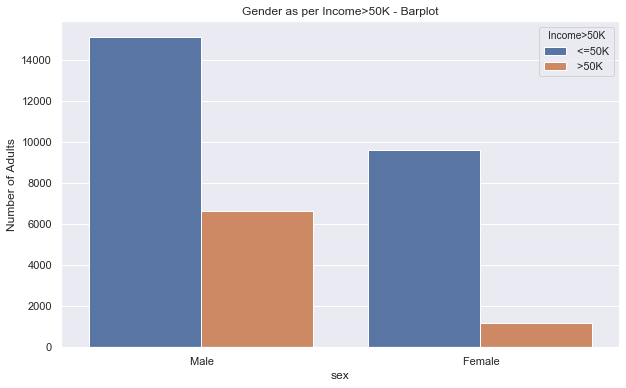

In [275]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",hue="Income>50K", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per Income>50K - Barplot')

The proportion of females earning more than 50k out of the sample female cases is very low (almost 1/10), compared to proportion of males earning more than 50k out of the sample male cases (almost 1/2). This suggests that very few females earn more than 50k dollars annually

Let us look at the reasons why males have higher incomes

Text(0.5, 1.0, 'Gender vs age - Boxplot')

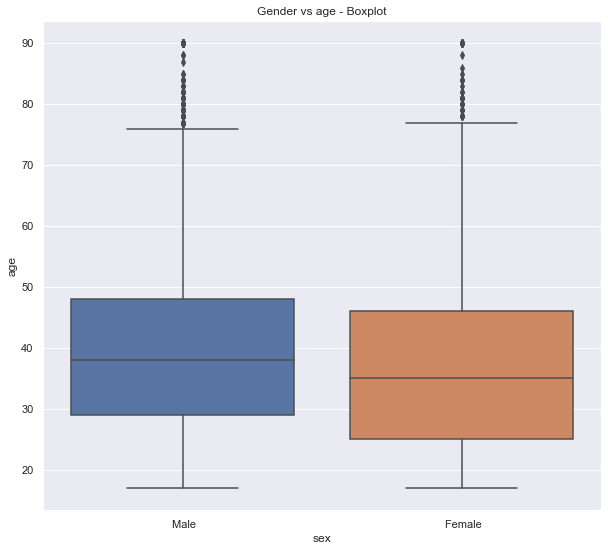

In [276]:
plt.figure(figsize=(10,9))
sns.boxplot(x="sex", y="age",data=df)
plt.title('Gender vs age - Boxplot')

In the dataset, males have relatively higher median ages compared to females, we have also seen that relatively higher age implies higher incomes, so this explains a bit why very few females earn more than 50k dollars annually

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_level  32561 non-null  object
 5   marital_status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   31978 non-null  object
 14  Income>50K       32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


Text(0.5, 1.0, 'Gender as per workclass - Barplot')

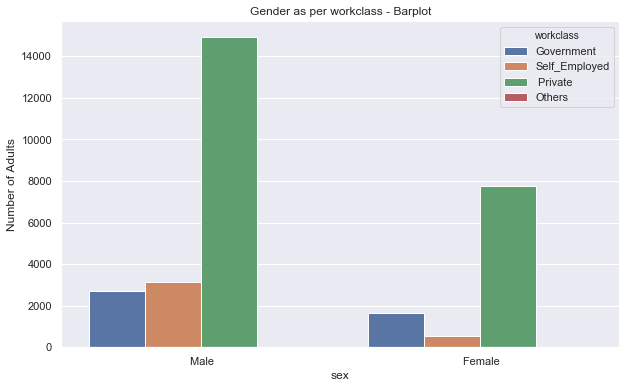

In [278]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",hue="workclass", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per workclass - Barplot')

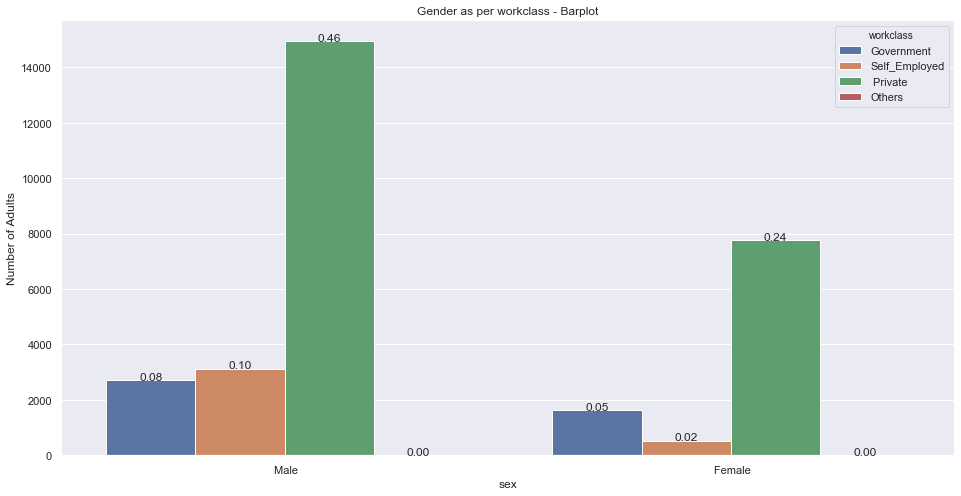

In [279]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
total = float(len(df)) # one person per row 
ax = sns.countplot(x="sex", hue="workclass", data=df) # for Seaborn version 0.7 and more
plt.ylabel('Number of Adults')
plt.title('Gender as per workclass - Barplot')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

Text(0.5, 1.0, 'Gender vs final_weight - Boxplot')

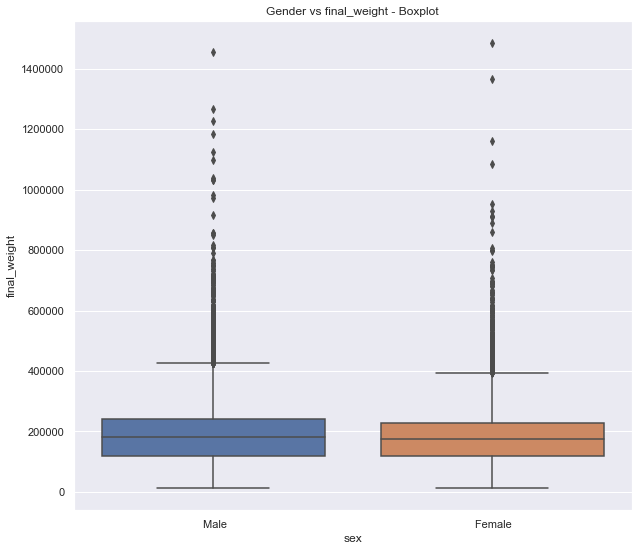

In [280]:
plt.figure(figsize=(10,9))
sns.boxplot(x="sex", y="final_weight",data=df)
plt.title('Gender vs final_weight - Boxplot')

The median value of final weight is almost the same for males and females

Text(0.5, 1.0, 'Gender as per education_level - Barplot')

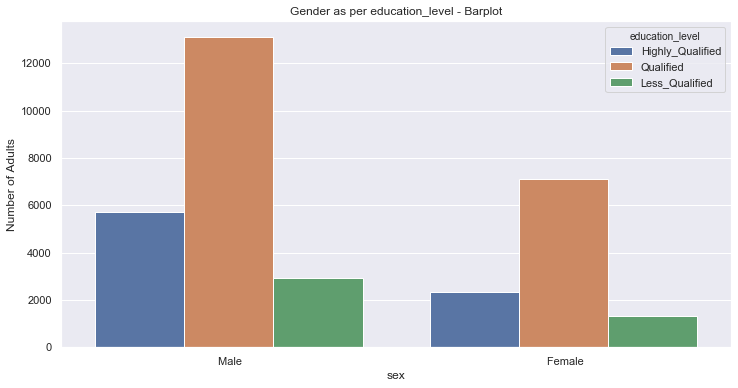

In [281]:
plt.figure(figsize=(12,6))
sns.countplot(x="sex",hue="education_level", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per education_level - Barplot')

Very few females have education level ≥ 14 in the dataset where the majority of adults earn more than 50k dollars annually, this explains a bit why very few females earn more than 50k dollars annually

Text(0.5, 1.0, 'Gender as per marital_status - Barplot')

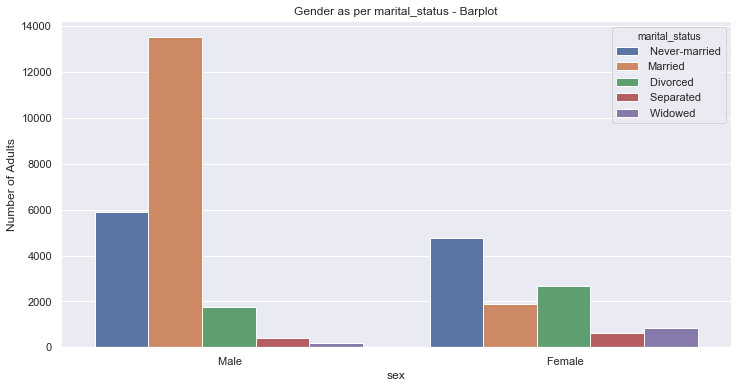

In [282]:
plt.figure(figsize=(12,6))
sns.countplot(x="sex",hue="marital_status", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per marital_status - Barplot')

Earlier we have seen that people who earn more than 50k dollars are mostly married with civilian spouses, females have a very low representation in that categoriy which explains to an extent about higher incomes of males in the sample

Text(0.5, 1.0, 'Gender as per occupation - Barplot')

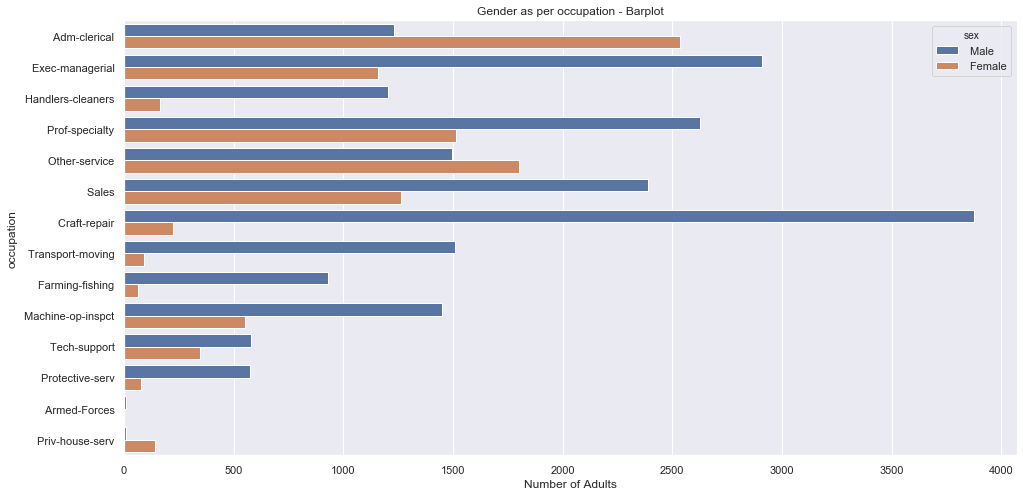

In [283]:
plt.figure(figsize=(16,8))
sns.countplot(y="occupation",hue="sex", data = df)
plt.xlabel('Number of Adults')
plt.title('Gender as per occupation - Barplot')

Text(0.5, 1.0, 'Gender as per occupation - Barplot')

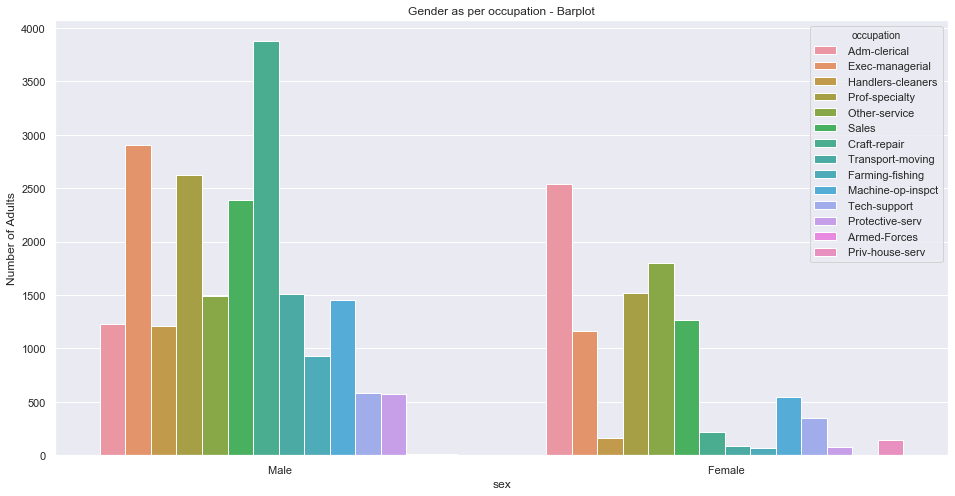

In [284]:
plt.figure(figsize=(16,8))
sns.countplot(x="sex",hue="occupation", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per occupation - Barplot')

Representation of females is very high in Adm-clerical jobs which is a relatively low income occupation, also female representation is very low in  craft repair occupation which is a relatively higher income occupation, this also explains a bit why males earn higher

Text(0.5, 1.0, 'Gender as per relationship - Barplot')

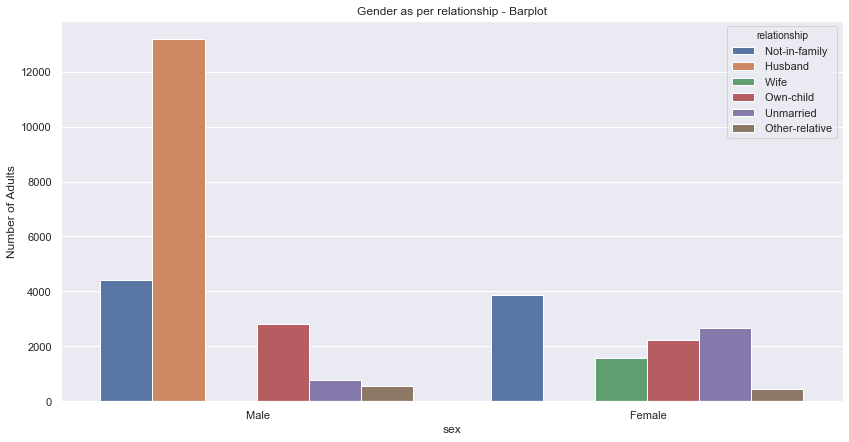

In [285]:
plt.figure(figsize=(14,7))
sns.countplot(x="sex",hue="relationship", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per relationship - Barplot')

Earlier we have seen that a hughe proportion of adults who earn more than 50k dollars are Husbands, this explains to an extent why more males earn higher than 50k dollars compared to females

Text(0.5, 1.0, 'Gender as per race - Barplot')

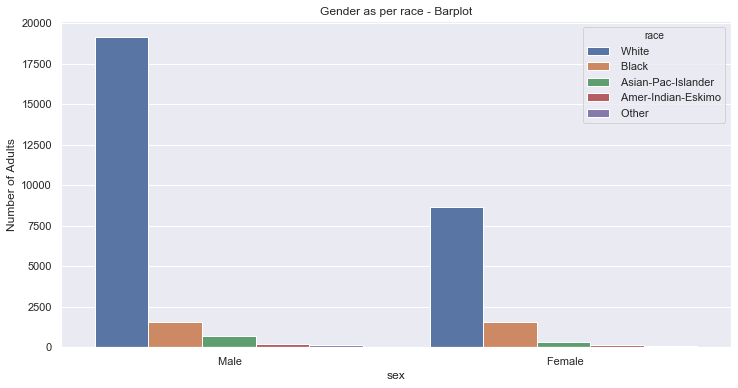

In [286]:
plt.figure(figsize=(12,6))
sns.countplot(x="sex",hue="race", data = df)
plt.ylabel('Number of Adults')
plt.title('Gender as per race - Barplot')

Earlier we have seen that very few blacks earn more than 50k dollars in the sample, also the number of black females is almost equal to that of black males in the dataset which explains a bit why very few females earn more than 50k dollars annually (for whites the number  of females is less than half the number of males)

Text(0.5, 1.0, 'Gender vs capital_gain - Boxplot')

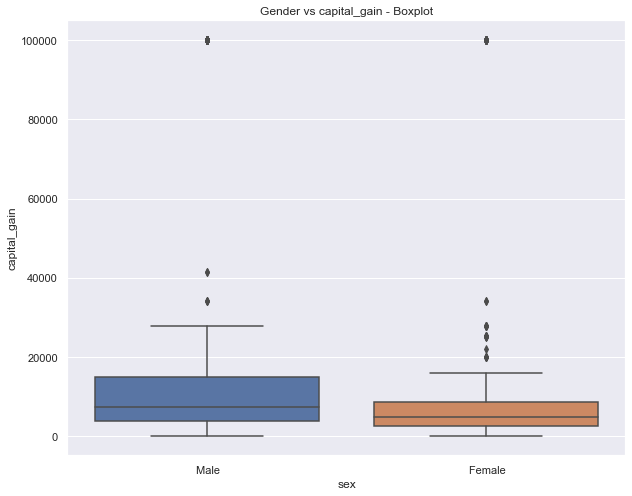

In [287]:
plt.figure(figsize=(10,8))
sns.boxplot(x="sex", y="capital_gain",data=gain)
plt.title('Gender vs capital_gain - Boxplot')

Compared to males, females have relatively lesser median incomes from investments

Text(0.5, 1.0, 'Gender vs capital_loss - Boxplot')

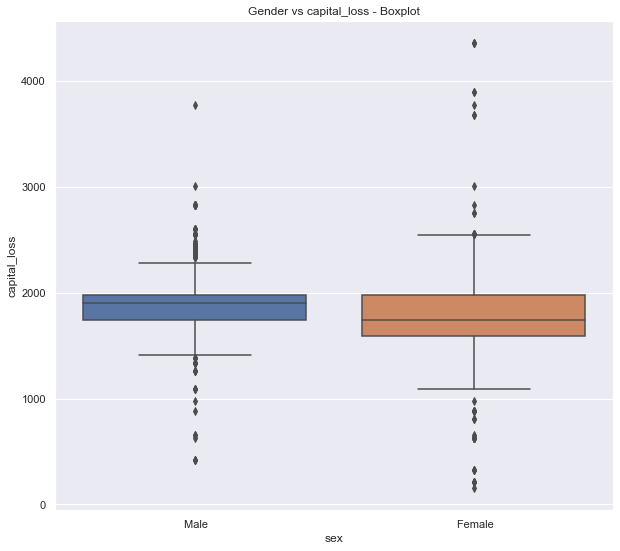

In [288]:
plt.figure(figsize=(10,9))
sns.boxplot(x="sex", y="capital_loss",data=loss)
plt.title('Gender vs capital_loss - Boxplot')

Compared to males, females have relatively lesser median losses from investments, this shows that males take higher risks while investing which is why they have higher incomes as well as higher losses from investments

Text(0.5, 1.0, 'gender vs work_hours_per_week - Boxplot')

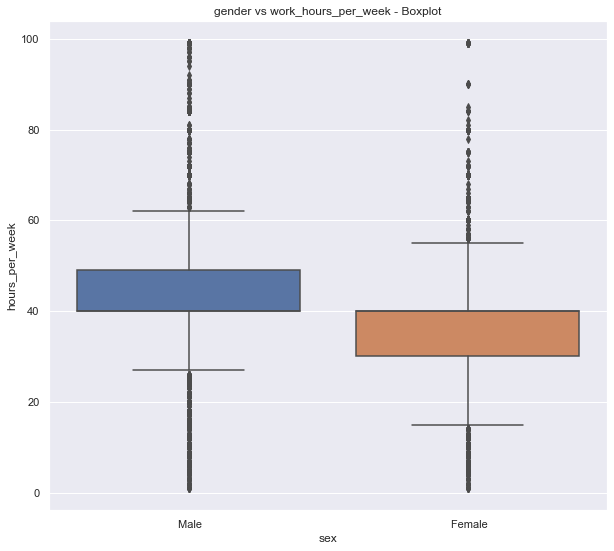

In [289]:
plt.figure(figsize=(10,9))
sns.boxplot(x="sex", y="hours_per_week",data=df)
plt.title('gender vs work_hours_per_week - Boxplot')

from the above plot, males usually work for higher number of hours per weeks which explains why very few females have incomes more than 50k dollars

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_level  32561 non-null  object
 5   marital_status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   31978 non-null  object
 14  Income>50K       32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


In [291]:
#Let's look at the null values present in the dataset
df.isnull().sum()

age                   0
workclass          1836
final_weight          0
education             0
education_level       0
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
Income>50K            0
dtype: int64

Text(0.5, 1, 'Null values visualization')

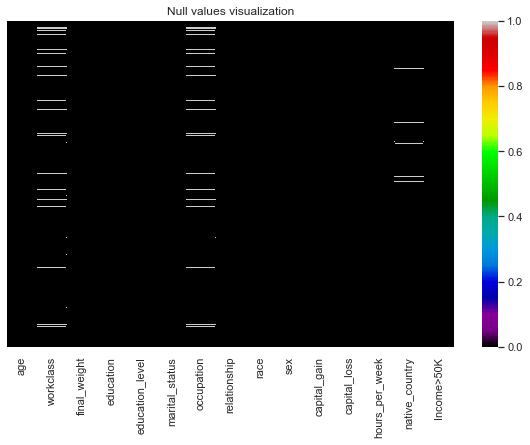

In [292]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap="nipy_spectral")
plt.title('Null values visualization')

In [293]:
df.shape

(32561, 15)

In [294]:
# Let's drop the null value cases for the model
df.dropna(inplace=True)
df.shape

(30162, 15)

In [295]:
df["Income>50K"].value_counts()

 <=50K    22654
 >50K      7508
Name: Income>50K, dtype: int64

In [296]:
df.skew()

age                0.530228
final_weight       1.459220
capital_gain      11.902682
capital_loss       4.526380
hours_per_week     0.330869
dtype: float64

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   final_weight     30162 non-null  int64 
 3   education        30162 non-null  object
 4   education_level  30162 non-null  object
 5   marital_status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   sex              30162 non-null  object
 10  capital_gain     30162 non-null  int64 
 11  capital_loss     30162 non-null  int64 
 12  hours_per_week   30162 non-null  int64 
 13  native_country   30162 non-null  object
 14  Income>50K       30162 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


In [298]:
df.drop("education",axis=1,inplace=True)

In [301]:
df.drop("native_country",axis=1,inplace=True)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   final_weight     30162 non-null  int64 
 3   education_level  30162 non-null  object
 4   marital_status   30162 non-null  object
 5   occupation       30162 non-null  object
 6   relationship     30162 non-null  object
 7   race             30162 non-null  object
 8   sex              30162 non-null  object
 9   capital_gain     30162 non-null  int64 
 10  capital_loss     30162 non-null  int64 
 11  hours_per_week   30162 non-null  int64 
 12  Income>50K       30162 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [303]:
cat = pd.get_dummies(df)
cat

,age,final_weight,capital_gain,capital_loss,hours_per_week,workclass_ Private,workclass_Government,workclass_Others,workclass_Self_Employed,education_level_Highly_Qualified,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,Income>50K_ <=50K,Income>50K_ >50K
0,39,77516,2174,0,40,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,50,83311,0,0,13,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
2,38,215646,0,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53,234721,0,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,338409,0,0,40,1,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
32557,40,154374,0,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32558,58,151910,0,0,40,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32559,22,201490,0,0,20,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [304]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               30162 non-null  int64
 1   final_weight                      30162 non-null  int64
 2   capital_gain                      30162 non-null  int64
 3   capital_loss                      30162 non-null  int64
 4   hours_per_week                    30162 non-null  int64
 5   workclass_ Private                30162 non-null  uint8
 6   workclass_Government              30162 non-null  uint8
 7   workclass_Others                  30162 non-null  uint8
 8   workclass_Self_Employed           30162 non-null  uint8
 9   education_level_Highly_Qualified  30162 non-null  uint8
 10  education_level_Less_Qualified    30162 non-null  uint8
 11  education_level_Qualified         30162 non-null  uint8
 12  marital_status_ Divorced          301

In [305]:
cat.drop(["workclass_Others","education_level_Less_Qualified","marital_status_ Divorced","occupation_ Adm-clerical","relationship_ Not-in-family","race_ Other","sex_ Male","Income>50K_ <=50K"],axis=1,inplace=True)
cat.shape

(30162, 38)

In [306]:
X=cat.drop("Income>50K_ >50K", axis=1)
y=cat["Income>50K_ >50K"]

In [307]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.04279571, -1.0627216 ,  0.14609228, ..., -0.32096262,
         0.40382431, -0.69280616],
       [ 0.88028814, -1.00787131, -0.14744462, ..., -0.32096262,
         0.40382431, -0.69280616],
       [-0.03333996,  0.24469349, -0.14744462, ..., -0.32096262,
         0.40382431, -0.69280616],
       ...,
       [ 1.48937355, -0.3585745 , -0.14744462, ..., -0.32096262,
         0.40382431,  1.44340518],
       [-1.25151078,  0.11070545, -0.14744462, ..., -0.32096262,
         0.40382431, -0.69280616],
       [ 1.0325595 ,  0.92884082,  1.88111954, ..., -0.32096262,
         0.40382431,  1.44340518]])

Let's do Principal Component Analysis (PCA) for the input features

In [320]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (30162, 37)
Reduced shape: (30162, 12)


Finding the best random state

In [321]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 25 is 0.8338416655615966


In [322]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.25,random_state=25)

In [323]:
print(X_train.shape,"\n",X_test.shape)

(22621, 12) 
 (7541, 12)


Observing performance of different classifier algorithms

In [324]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [337]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
#SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier(n_estimators=27) #from the GridsearchCV parameter tuning performed later

In [338]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
#models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [339]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=25, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8338416655615966


Cross val score =  0.7905642781092818


roc_auc_score =  0.7371644576111421


Classification Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      5725
           1       0.70      0.55      0.61      1816

    accuracy                           0.83      7541
   macro avg       0.78      0.74      0.75      7541
weighted avg       0.83      0.83      0.83      7541



Confusion Matrix 
[[5288  437]
 [ 816 1000]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier **************

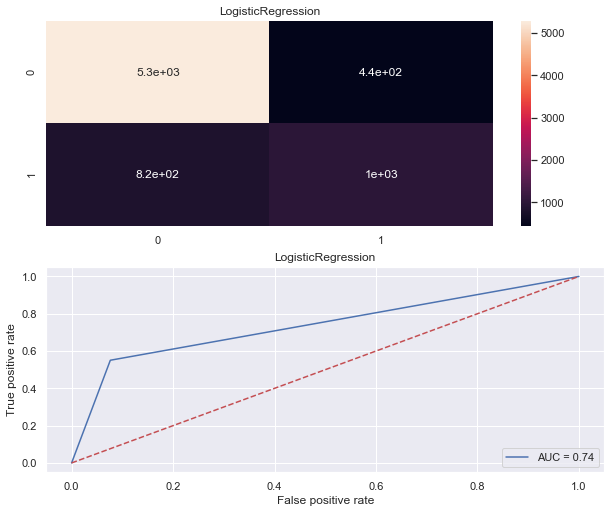

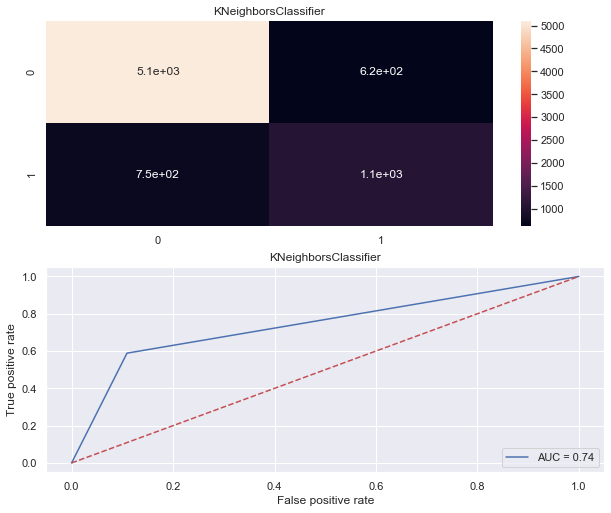

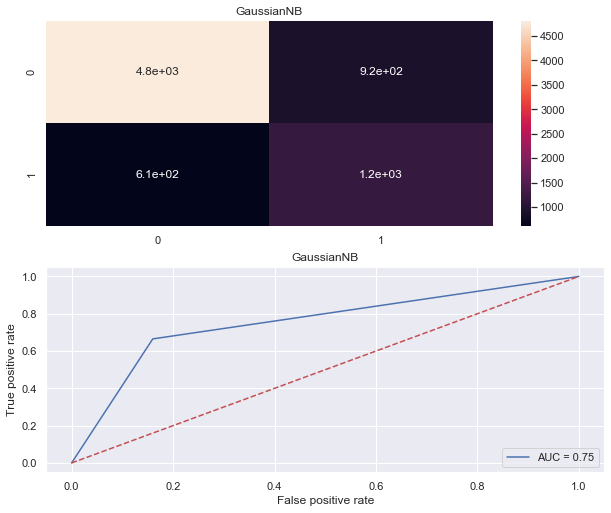

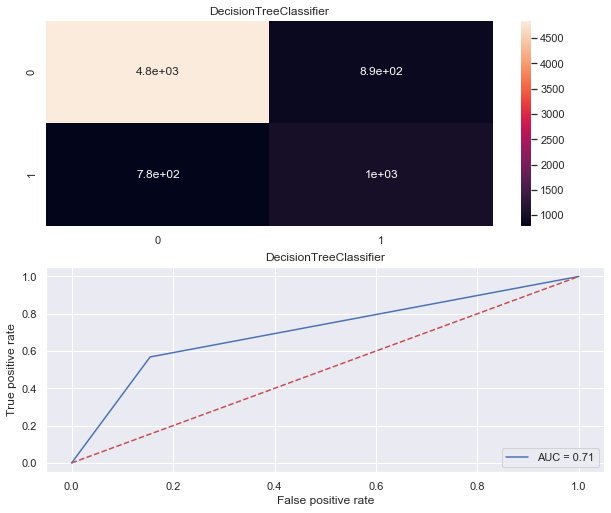

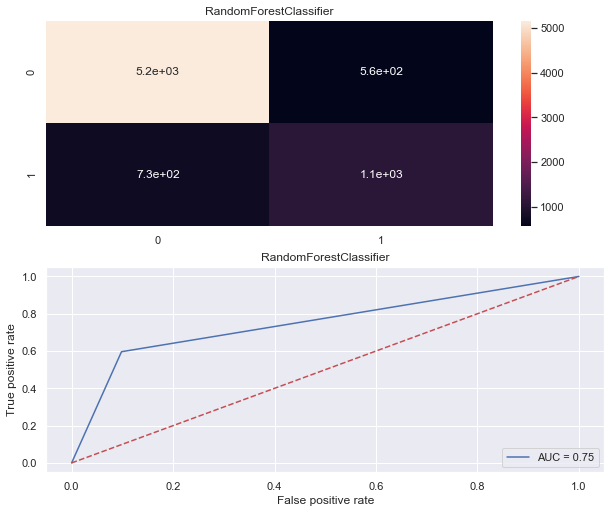

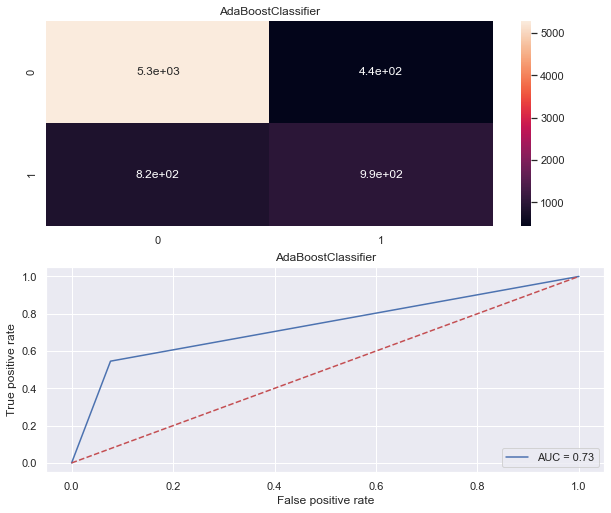

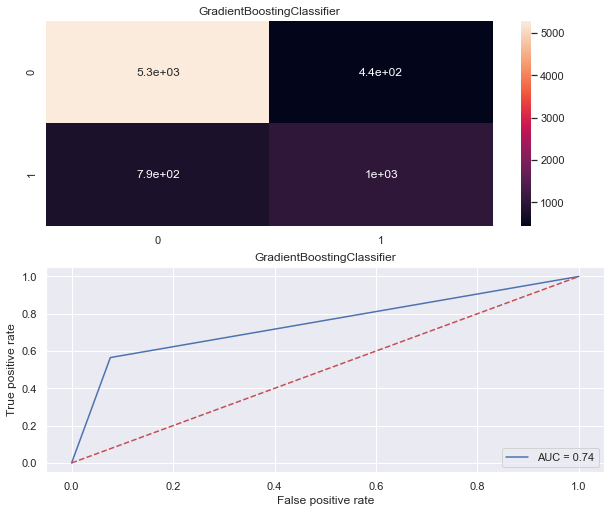

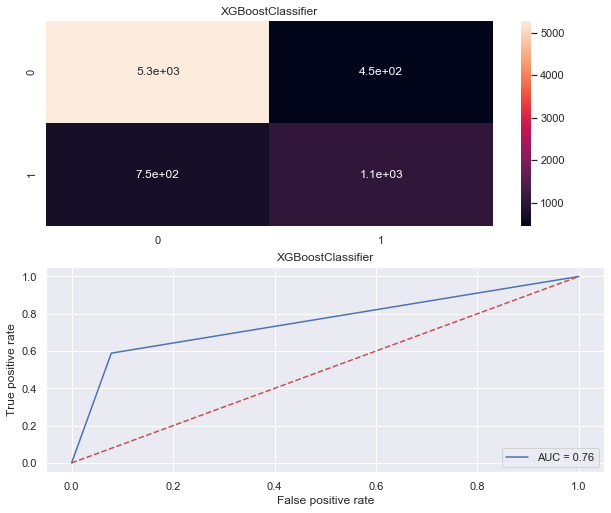

In [340]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [341]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,83.384167,79.056428,73.716446
1,KNeighborsClassifier,81.806127,76.808571,73.974304
2,GaussianNB,79.790479,78.827666,75.259912
3,DecisionTreeClassifier,77.854396,80.654450,70.676106
4,RandomForestClassifier,82.813950,84.659531,74.901251
5,AdaBoostClassifier,83.238297,85.422072,73.451181
6,GradientBoostingClassifier,83.728948,86.015530,74.432305
7,XGBoostClassifier,84.153295,86.376926,75.520156


Clearly XGBoost gives the best generalization performance so let's find the best parameter for it

In [336]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [26,27,28]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
    

In [172]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(XGB,'Adult_Income_Classification.pkl')

['Adult_Income_Classification.pkl']